# ELT Project
Group: Jennifer Lawless, Mingming Chen, Jie Bai

In [1]:
!pip install psycopg2

In [39]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle, islice

### Extract CSVs into DataFrames

In [3]:
csv_file = 'Resources/alldata.csv'
datascientist_locations = pd.read_csv(csv_file)
datascientist_locations.head(2)

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"


In [4]:
csv_file1 = 'Resources/indeed_job_dataset.csv'
datascientist_skills = pd.read_csv(csv_file1)
datascientist_skills.head(2)

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,Unnamed: 6,No_of_Skills,Company,No_of_Reviews,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"SAP, SQL",NaN,2,Express Scripts,3301.0,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"Machine Learning, R, SAS, SQL, Python",NaN,5,Money Mart Financial Services,NaN,...,0,0,0,0,0,0,0,0,0,0


### Transform location DataFrame

In [5]:
# Create a filtered dataframe from specific columns
datascientist_locations = datascientist_locations[['position','company','location']].copy()
datascientist_locations.head(2)

# Clean the data by dropping NaN rows
datascientist_locations = datascientist_locations.dropna(how='any')
# Verify the dropped rows
datascientist_locations.count()

position    6953
company     6953
location    6953
dtype: int64

### Transform Skill DataFrame 

In [6]:
# Create a filtered dataframe from specific columns
datascientist_skills = datascientist_skills[['Job_Type','Skill','Company']].copy()
datascientist_skills.head(2)

# Rename the column headers
datascientist_skills = datascientist_skills.rename(columns={"Job_Type": "job_type",
                                                         "Skill": "skill",
                                                         "Company": "company"})

# Clean the data by dropping NaN rows
datascientist_skills = datascientist_skills.dropna(how='any')
# Verify the dropped rows
datascientist_skills.count()

job_type    5384
skill       5384
company     5384
dtype: int64

### Create database connection

In [7]:
connection_string = "postgres:changeme@localhost:5432/data_job"
engine = create_engine(f'postgresql://{connection_string}')

In [8]:
# Confirm tables
engine.table_names()

['datascience_location', 'datascience_skill', 'data_location']

### Load DataFrames into database

In [9]:
datascientist_locations.to_sql(name='datascience_location', con=engine, if_exists='append', index=False)

In [10]:
datascientist_skills.to_sql(name='datascience_skill', con=engine, if_exists='append', index=False)

In [11]:
# Comfirm data has been added by querying the datascience_location table
pd.read_sql_query('select * from datascience_location', con=engine).head(2)

,position,company,location
0,Development Director,ALS TDI,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Atlanta, GA"


In [12]:
# Comfirm data has been added by querying the datascience_skill table
pd.read_sql_query('select * from datascience_skill', con=engine).head(2)

,job_type,skill,company
0,data_scientist,"SAP, SQL",Express Scripts
1,data_scientist,"Machine Learning, R, SAS, SQL, Python",Money Mart Financial Services


### Simple Analysis

In [13]:
# Tanke a look at the states that have the most demands for data science ralated jobs
datascientist_locations['location'].value_counts()

Seattle, WA                563
New York, NY               508
Cambridge, MA              487
Boston, MA                 454
San Francisco, CA          425
San Diego, CA              294
Chicago, IL                292
Boulder, CO                233
Washington, DC             230
Sunnyvale, CA              221
Mountain View, CA          199
Los Angeles, CA            187
Austin, TX                 156
Atlanta, GA                147
Redmond, WA 98052          117
Seattle, WA 98109           95
Cambridge, MA 02139         95
New York, NY 10016          83
San Diego, CA 92121         71
Cambridge, MA 02142         64
South San Francisco, CA     53
Chicago, IL 60654           45
San Francisco, CA 94103     40
Chicago, IL 60601           40
Mountain View, CA 94043     39
Redmond, WA                 39
Seattle, WA 98101           34
Seattle, WA 98104           34
Cambridge, MA 02140         33
Boston, MA 02116            31
                          ... 
Short Hills, NJ              1
San Fran

In [16]:
# Create a dataframe that list the top10 states that provide most datascientist jobs with the count percentage 
location_distribution = pd.DataFrame({
    "state":["CA","WA","NY","MA","IL","CO","DC","TX","GA","NJ"],
    "percentage":[datascientist_locations['location'].str.contains('CA').value_counts()[True]/6953,
                  datascientist_locations['location'].str.contains('WA').value_counts()[True]/6953,
                  datascientist_locations['location'].str.contains('NY').value_counts()[True]/6953,
                  datascientist_locations['location'].str.contains('MA').value_counts()[True]/6953,
                  datascientist_locations['location'].str.contains('IL').value_counts()[True]/6953,
                  datascientist_locations['location'].str.contains('CO').value_counts()[True]/6953,
                  datascientist_locations['location'].str.contains('DC').value_counts()[True]/6953,
                  datascientist_locations['location'].str.contains('TX').value_counts()[True]/6953,
                  datascientist_locations['location'].str.contains('GA').value_counts()[True]/6953,
                  datascientist_locations['location'].str.contains('NJ').value_counts()[True]/6953]
})
location_distribution = data_location.sort_values("percentage", ascending=False)
location_distribution = data_location.reset_index(drop=True)
location_distribution

,state,percentage
0,CA,0.309507
1,MA,0.190278
2,WA,0.134474
3,NY,0.133180
4,IL,0.067741
5,DC,0.048900
6,GA,0.038688
7,CO,0.036100
8,TX,0.031353
9,NJ,0.009780


In [17]:
# Load dataframe into SQL database
location_distribution.to_sql(name='location_distribution', con=engine, if_exists='append', index=False)
pd.read_sql_query('select * from location_distribution', con=engine)

,state,percentage
0,CA,0.309507
1,MA,0.190278
2,WA,0.134474
3,NY,0.133180
4,IL,0.067741
5,DC,0.048900
6,GA,0.038688
7,CO,0.036100
8,TX,0.031353
9,NJ,0.009780


<function matplotlib.pyplot.show(*args, **kw)>

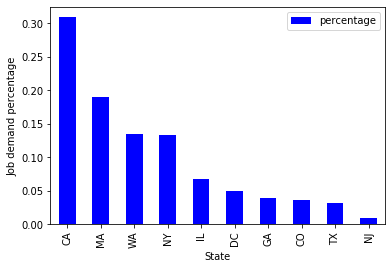

In [40]:
#Plot the bar chart for location distribution
my_colors = list(islice(cycle(['b','r','g','y','k']), None, len(location_distribution)))
distribution_chart = location_distribution.plot(kind='bar', stacked = True, color=my_colors)
distribution_chart.set_xlabel("State")
distribution_chart.set_ylabel("Job demand percentage")

plt.show